#### This notebook normalizes sales metrics and adds features on which to group for data-based clustering. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
retail_df = pd.read_csv("retail_df.csv")
display(retail_df.head())

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
good_products = pd.read_csv("descriptions_month_filtered.csv")
display(good_products)

,description,earliest_invoicedate,latest_invoicedate,unique_invoice_months,sum_quantity
0,12 EGG HOUSE PAINTED WOOD,2009-12-01 11:41:00,2011-12-08 15:54:00,25,563
1,12 PENCILS SMALL TUBE SKULL,2009-12-01 12:47:00,2011-12-09 12:20:00,25,12899
2,12 PENCILS TALL TUBE SKULLS,2009-12-01 11:37:00,2011-12-09 10:03:00,25,4899
3,12 PENCILS TALL TUBE WOODLAND,2009-12-01 12:47:00,2011-12-09 08:59:00,25,4703
4,12 RED ROSE PEG PLACE SETTINGS,2009-12-03 16:54:00,2011-12-08 19:28:00,25,1277
...,...,...,...,...,...
543,WOVEN ROSE GARDEN CUSHION COVER,2009-12-03 13:32:00,2011-12-09 10:03:00,25,494
544,WRAP PINK FAIRY CAKES,2009-12-01 18:35:00,2011-12-08 12:29:00,25,16615
545,ZINC HEART LATTICE T-LIGHT HOLDER,2009-12-14 18:03:00,2011-12-07 09:22:00,25,1471
546,ZINC METAL HEART DECORATION,2009-12-01 11:41:00,2011-12-08 14:38:00,25,20149


In [4]:
df = retail_df[retail_df['description'].isin(good_products['description'])]

In [5]:
num_unique_descriptions = df['description'].nunique()
print(num_unique_descriptions)


548


/var/folders/r6/b7bdkhqd1hncgpbf6xtt1q600000gn/T/ipykernel_35922/2000479525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoicedate'] = pd.to_datetime(df['invoicedate'])
/var/folders/r6/b7bdkhqd1hncgpbf6xtt1q600000gn/T/ipykernel_35922/2000479525.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = df['invoicedate'].dt.to_period('Q')


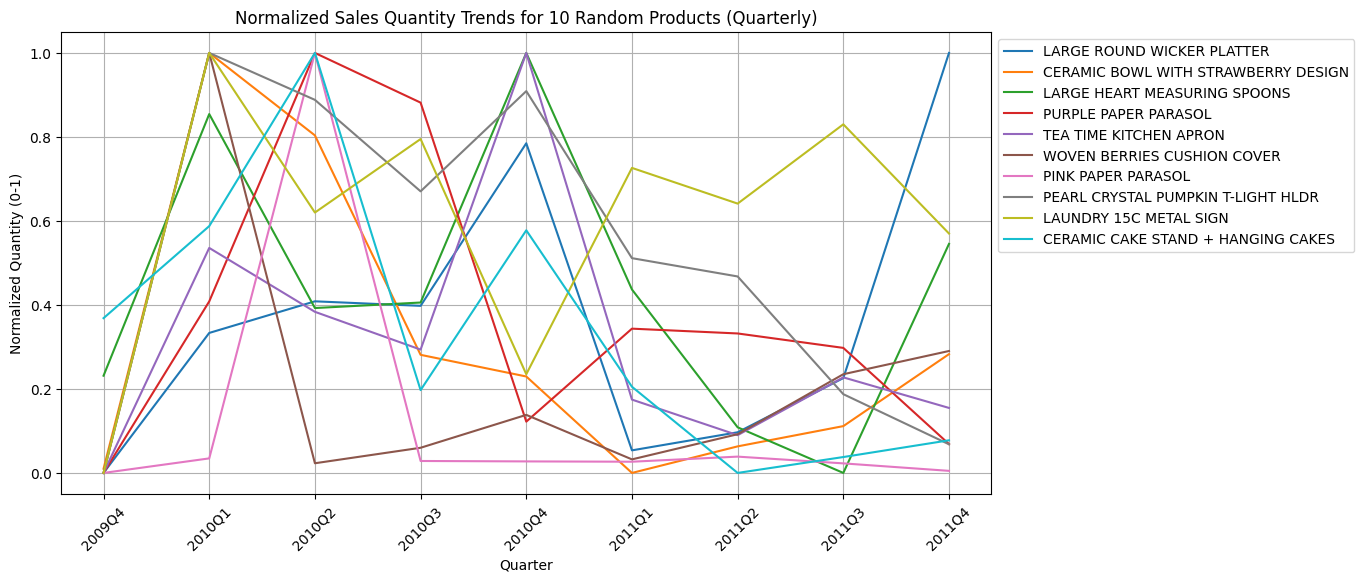

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure date is in datetime format
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

# Extract year and quarter
df['quarter'] = df['invoicedate'].dt.to_period('Q')

# Aggregate quantity by quarter and product
df_grouped = df.groupby(['quarter', 'description'])['quantity'].sum().reset_index()

# Normalize each product's sales (Min-Max scaling per product)
df_grouped['quarter'] = df_grouped['quarter'].astype(str)  # Convert for plotting

# Create a new column for normalized values
df_grouped['normalized_quantity'] = 0.0

for product in df_grouped['description'].unique():
    product_df = df_grouped[df_grouped['description'] == product].copy()
    min_val = product_df['quantity'].min()
    max_val = product_df['quantity'].max()
    
    if max_val != min_val:  # Avoid division by zero
        df_grouped.loc[df_grouped['description'] == product, 'normalized_quantity'] = (product_df['quantity'] - min_val) / (max_val - min_val)
    else:
        df_grouped.loc[df_grouped['description'] == product, 'normalized_quantity'] = 0  # If all values are the same, set to 0

# Select a random sample of 10 products
np.random.seed(42)  # Ensure reproducibility
sampled_products = np.random.choice(df_grouped['description'].unique(), size=10, replace=False)

# Filter dataset for the sampled products
df_sampled = df_grouped[df_grouped['description'].isin(sampled_products)]

# Plot normalized trends
plt.figure(figsize=(12, 6))

for product in sampled_products:
    product_df = df_sampled[df_sampled['description'] == product]
    plt.plot(product_df['quarter'], product_df['normalized_quantity'], label=product)

# Customize plot
plt.xlabel('Quarter')
plt.ylabel('Normalized Quantity (0-1)')
plt.title('Normalized Sales Quantity Trends for 10 Random Products (Quarterly)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside

plt.show()


/var/folders/r6/b7bdkhqd1hncgpbf6xtt1q600000gn/T/ipykernel_35922/316066161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoicedate'] = pd.to_datetime(df['invoicedate'])
/var/folders/r6/b7bdkhqd1hncgpbf6xtt1q600000gn/T/ipykernel_35922/316066161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['invoicedate'].dt.to_period('M')  # Monthly period


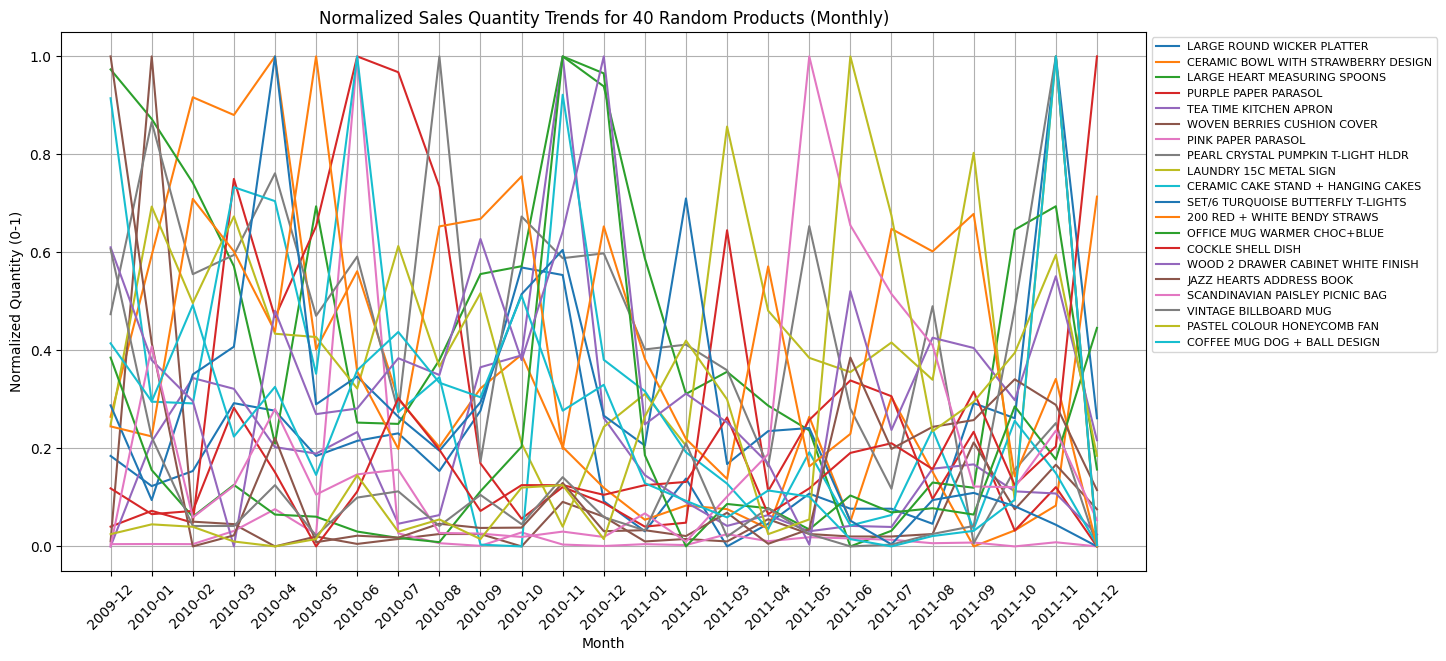

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure date is in datetime format
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

# Extract year and month
df['month'] = df['invoicedate'].dt.to_period('M')  # Monthly period

# Aggregate quantity by month and product
df_grouped = df.groupby(['month', 'description'])['quantity'].sum().reset_index()

# Convert month to string for plotting
df_grouped['month'] = df_grouped['month'].astype(str)

# Normalize each product's sales (Min-Max scaling per product)
df_grouped['normalized_quantity'] = 0.0

for product in df_grouped['description'].unique():
    product_df = df_grouped[df_grouped['description'] == product].copy()
    min_val = product_df['quantity'].min()
    max_val = product_df['quantity'].max()
    
    if max_val != min_val:  # Avoid division by zero
        df_grouped.loc[df_grouped['description'] == product, 'normalized_quantity'] = (product_df['quantity'] - min_val) / (max_val - min_val)
    else:
        df_grouped.loc[df_grouped['description'] == product, 'normalized_quantity'] = 0  # If all values are the same, set to 0

# Select a random sample of 40 products
np.random.seed(42)  # Ensure reproducibility
sample_size = min(20, len(df_grouped['description'].unique()))  # Handle cases with fewer than 40 unique products
sampled_products = np.random.choice(df_grouped['description'].unique(), size=sample_size, replace=False)

# Filter dataset for the sampled products
df_sampled = df_grouped[df_grouped['description'].isin(sampled_products)]

# Plot normalized trends
plt.figure(figsize=(14, 7))

for product in sampled_products:
    product_df = df_sampled[df_sampled['description'] == product]
    plt.plot(product_df['month'], product_df['normalized_quantity'], label=product)

# Customize plot
plt.xlabel('Month')
plt.ylabel('Normalized Quantity (0-1)')
plt.title('Normalized Sales Quantity Trends for 40 Random Products (Monthly)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)  # Adjust legend size

plt.show()


In [9]:
# Pivot the data to have months as columns and products as index
df_pivot = df_grouped.pivot(index='description', columns='month', values='normalized_quantity').fillna(0)

# Add a column for the sum of all monthly values
df_pivot['total_normalized_quantity'] = df_pivot.sum(axis=1)

# Find the month with the maximum quantity (excluding 'total_normalized_quantity')
df_pivot['max_month'] = df_pivot.drop(columns=['total_normalized_quantity']).idxmax(axis=1)

# Reset index to keep 'description' as a column
df_pivot.reset_index(inplace=True)

# Display the result
display(df_pivot)

# Save the dataframe to a CSV file
df_pivot.to_csv('normalized_sales_summary.csv', index=False)



month,description,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,total_normalized_quantity,max_month
0,12 EGG HOUSE PAINTED WOOD,0.141243,1.000000,0.096045,0.169492,0.129944,0.039548,0.016949,0.039548,0.050847,...,0.016949,0.016949,0.016949,0.011299,0.039548,0.084746,0.107345,0.000000,2.757062,2010-01
1,12 PENCILS SMALL TUBE SKULL,0.211029,0.213235,0.520588,0.436765,0.194118,0.300000,0.403676,0.202206,0.218382,...,0.385294,0.586765,0.257353,0.549265,0.250735,0.654412,0.304412,0.000000,9.299265,2010-11
2,12 PENCILS TALL TUBE SKULLS,0.700787,0.036220,0.267717,0.270866,0.119685,0.275591,0.129134,0.130709,0.160630,...,0.064567,0.017323,0.080315,0.201575,0.329134,0.355906,1.000000,0.100787,6.179528,2011-11
3,12 PENCILS TALL TUBE WOODLAND,0.601108,0.684211,1.000000,0.531856,0.343490,0.144044,0.141274,0.160665,0.387812,...,0.592798,0.013850,0.454294,0.351801,0.631579,0.252078,0.972299,0.024931,10.119114,2010-02
4,12 RED ROSE PEG PLACE SETTINGS,0.383459,0.413534,0.000000,0.436090,0.556391,1.000000,0.210526,0.578947,0.278195,...,0.075188,0.240602,0.082707,0.052632,0.654135,0.090226,0.375940,0.067669,8.661654,2010-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,WOVEN ROSE GARDEN CUSHION COVER,0.016393,1.000000,0.092896,0.087432,0.049180,0.021858,0.010929,0.010929,0.060109,...,0.005464,0.060109,0.038251,0.032787,0.267760,0.218579,0.202186,0.114754,2.562842,2010-01
544,WRAP PINK FAIRY CAKES,0.222222,1.000000,0.746667,0.888889,0.844444,0.244444,0.755556,0.777778,1.000000,...,0.511111,0.155556,0.222222,0.088889,0.333333,0.711111,0.333333,0.000000,12.546667,2010-01
545,ZINC HEART LATTICE T-LIGHT HOLDER,0.000000,0.099415,0.678363,0.590643,0.140351,0.374269,0.409357,0.385965,0.081871,...,0.286550,0.023392,0.128655,0.175439,0.105263,0.157895,0.467836,0.198830,7.140351,2011-04
546,ZINC METAL HEART DECORATION,0.692968,0.540526,0.462158,0.588835,0.312936,0.664520,0.334407,0.318304,1.000000,...,0.184112,0.139560,0.202362,0.250134,0.245840,0.451959,0.376275,0.000000,9.889426,2010-08
